#  NLP unassessed exercises: This notebook is based on sklearn's tutorial 'Working with Text Data' with some extras and exercises

In [1]:
import sklearn

In [2]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [3]:
#Loading the 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt

In [4]:
# with a random seed, always keep it the same number each time
# for reproducibility (here 42 (=the meaning of life...))
twenty_train = fetch_20newsgroups(subset='train',categories=categories, 
                                  shuffle=True, random_state=42)

In [5]:
#fetch_20newsgroups puts the data in the .data attribute
len(twenty_train.data)

2257

In [6]:
# Let's have a look at the first text in the collection
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [7]:
# Extracting features from text data
# Make sure you read the part of the tutorial/lecture about the bags of words
# representation

In [8]:
# A vectorizer is used to extract features from each item in the dataset
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer, which by default does some pre-processing
# tokenize (into single words/unigrams) + lower-casing
# to change these default settings look at the sklearn documentation
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [9]:
# let's see how many features we extracted (vocab size) using the CountVectorizer
print (len(count_vect.get_feature_names()))

35788


In [10]:
# let's see what is at position 15000 in the global vocab/feature vector
print (count_vect.get_feature_names()[15000])

furnace


In [11]:
# CountVectorizer has extracted all the features for all the docs from the data
# putting them into a matrix of dimensions #instances * #features
X_train_counts.shape

(2257, 35788)

In [12]:
# To see the index of a specific word, you can use the following
count_vect.vocabulary_.get(u'algorithm')

4690

In [13]:
# With the index a look at what's in the first row/document (see printout above)
# This should be the bag of words representation for the instance
first_row = X_train_counts[0].toarray()[0]
for i in range(len((list(first_row)))):
    # only look at elements that are non-0
    if first_row[i] >0:
        # print out the index of the feature, the feature name (i.e. the word), count
        print(i, count_vect.get_feature_names()[i], first_row[i])

177 071 2
230 0hb 1
587 14 1
2326 477 2
3062 8000 1
3166 8565 1
4017 ac 2
4378 advance 1
4808 also 1
5195 any 1
5201 anyone 1
5285 application 1
8696 city 4
9031 collier 3
9338 computer 1
9801 convert 1
9805 converting 2
9932 correct 1
12014 do 1
12051 does 1
12541 ec1v 1
12833 email 2
14085 fax 1
14281 files 2
14676 format 1
14887 from 1
15576 good 1
15837 group 1
16082 hampton 1
16881 host 1
16916 hp 2
16927 hpgl 1
17302 iii 2
17366 images 1
17389 img 1
17556 in 1
18268 into 1
18474 is 1
19458 know 1
19780 laserjet 2
20198 like 1
20253 lines 1
20459 london 1
21661 michael 3
23122 nntp 1
23610 of 1
23915 organization 1
24651 pc 1
24677 pd 1
25337 please 1
25361 plotter 1
25663 posting 1
26175 programmer 1
27836 response 1
28619 same 1
29022 sd345 1
30623 standard 1
31077 subject 1
31915 tel 1
32116 tga 1
32135 thanks 1
32142 the 5
32270 this 1
32391 tif 1
32493 to 4
33256 uk 2
33572 unit 1
33597 university 2
33915 utility 1
34755 way 1
34775 we 1
35312 would 1
35416 x3769 1


# Feature Weighing (beyond raw counts)
For many if not most applications, it is better to WEIGH terms wrt a document instead of simply COUNT their frequencies. This can be done using one of the weighing methods: MI, TFIDF, IG, all of which are implemented in scikit-learn

In [14]:
# For instance, to compute document vector representations in which 
# words are weighed using TFiDF, you can use TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

In [15]:
# fit and transform the training data with TF-IDF counts 
# Don't worry too much about the method for now, we will come back to it
# later in the module, but see the counts have been smoothed
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [16]:
# let's see how the counts have been turned into weights
first_row = X_train_tfidf[0].toarray()[0]
for i in range(len((list(first_row)))):
    # only look at elements which are non-0
    # notice these values are 'smoothed' from the raw counts
    if first_row[i] >0:
        print(i, count_vect.get_feature_names()[i], first_row[i])

177 071 0.25612026239119895
230 0hb 0.1348710554299733
587 14 0.05966162012870271
2326 477 0.24645540709354397
3062 8000 0.10783602957370853
3166 8565 0.1348710554299733
4017 ac 0.12491817585060791
4378 advance 0.0686611288079694
4808 also 0.03900412426100995
5195 any 0.0310951485922154
5201 anyone 0.04316199700711876
5285 application 0.08413454409085573
8696 city 0.314400065528974
9031 collier 0.3841803935867984
9338 computer 0.049671845493333165
9801 convert 0.07830787326179856
9805 converting 0.21567205914741705
9932 correct 0.06350565647195339
12014 do 0.031042954435189937
12051 does 0.037793189755988436
12541 ec1v 0.1348710554299733
12833 email 0.125601499991304
14085 fax 0.06666452137859726
14281 files 0.13635772403701527
14676 format 0.07691883385947053
14887 from 0.016797806021219684
15576 good 0.042703686357211466
15837 group 0.05417404179868691
16082 hampton 0.11382738609462074
16881 host 0.0360441471878483
16916 hp 0.17358472047671197
16927 hpgl 0.12322770354677198
17302 iii

# Naive Bayes

In [17]:
# Training a multinomial (beyond 2 class) NB classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [18]:
# Testing on a toy dataset
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [19]:
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [20]:
# A Pipeline is an object that can carry out count extraction, weighting
# and classification all in one go- be careful you know what each part does
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [21]:
# Proper testing on the full 20newsgroups test set
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)
docs_test = twenty_test.data
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)

# Evaluation

In [22]:
# Using the metrics package
from sklearn import metrics

# Get a classification report to see overall and per-class performance 
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



In [23]:
# Confusion matrix
metrics.confusion_matrix(twenty_test.target, predicted)

array([[192,   2,   6, 119],
       [  2, 347,   4,  36],
       [  2,  11, 322,  61],
       [  2,   2,   1, 393]])

In [24]:
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    cm = metrics.confusion_matrix(y_test, preds)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

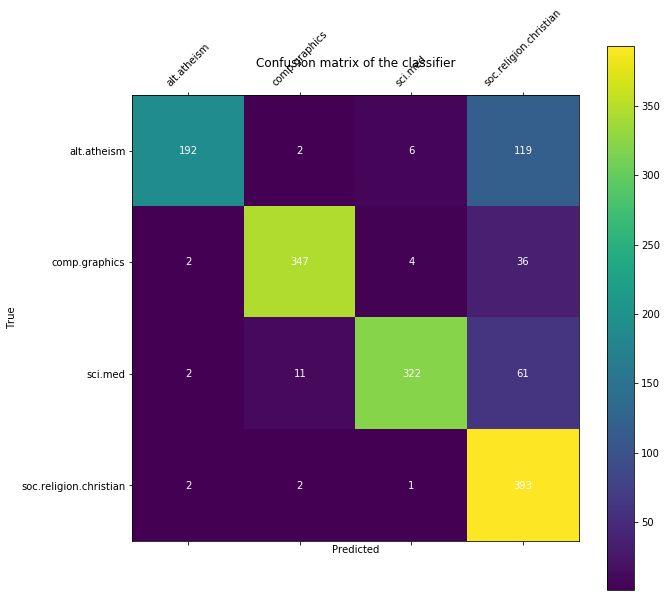

In [25]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

## Interpreting the confusion matrix
A perfect classification of this test set would be all the diagonals having the lightest colour, and everywhere else in the darkest colour (zero confusion/errors). In reality that won't happen with NLP applications worth studying.

Here there are quite a few squares outside the diagonal with moderate numbers. Notice that many alt.atheism documents were classified as soc.religion.christian, hence the lower recall for alt.atheism and lower precision for soc.religion.christian. Quite a few sci-med documents were classified as soc.religion.christian too, again affecting the precision of soc.religion.christian whilst making the recall of sci-med go down a little bit.

In [26]:
# Print out some predictions against the labels
n = 20
for doc, label_idx in zip(docs_test, twenty_test.target):
    label = twenty_train.target_names[label_idx]
    prediction = text_clf.predict([doc])[0]
    print('{0} => {1}, ground truth = {2}'.format(doc, twenty_train.target_names[prediction], label))
    n-=1
    if n <0:
        break
    print('*'*50)
    print()

From: brian@ucsd.edu (Brian Kantor)
Subject: Re: HELP for Kidney Stones ..............
Organization: The Avant-Garde of the Now, Ltd.
Lines: 12
NNTP-Posting-Host: ucsd.edu

As I recall from my bout with kidney stones, there isn't any
medication that can do anything about them except relieve the pain.

Either they pass, or they have to be broken up with sound, or they have
to be extracted surgically.

When I was in, the X-ray tech happened to mention that she'd had kidney
stones and children, and the childbirth hurt less.

Demerol worked, although I nearly got arrested on my way home when I barfed
all over the police car parked just outside the ER.
	- Brian
 => sci.med, ground truth = sci.med
**************************************************

From: rind@enterprise.bih.harvard.edu (David Rind)
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: Beth Israel Hospital, Harvard Medical School, Boston Mass., USA
Lines: 37
NNTP-Posting-Host: enterprise.bih.harvard.edu

In article

# Using a different learning algorithm: SVMs

In [27]:
from sklearn.linear_model import SGDClassifier

# NOTE the loss function ‘hinge’ for the SGDClassifier gives a linear SVM.
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42,
                                           max_iter=5, tol=None)),
                    ])

In [28]:
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)

In [29]:
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



## Interpreting improvement
Note how the overall P, R and F1 accuracy has improved and alt.atheism and soc.religion.christian have particularly improved. comp.graphics has not improved.

In [30]:
# Confusion matrix
metrics.confusion_matrix(twenty_test.target, predicted)

array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]])

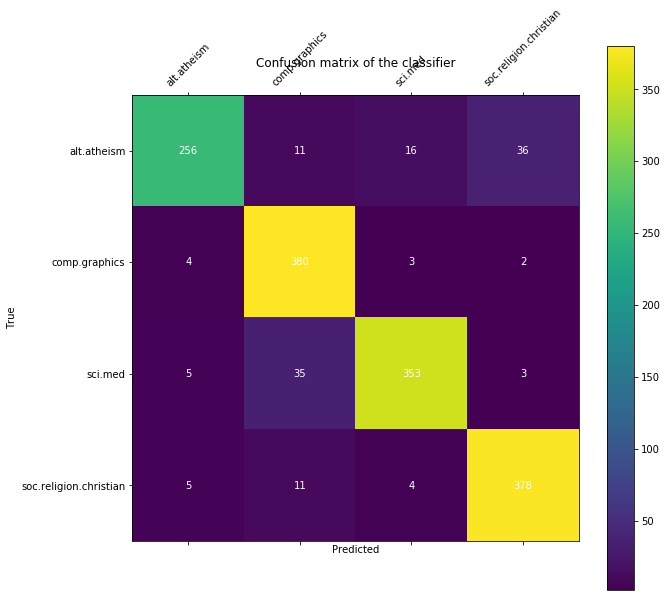

In [31]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

## Interpretation of confusion matrix
The confusion matrix shows the reduction of confusions of alt.atheism with soc.religion.christian and the reduction of sci.med documents being classified as soc.religion.christian.

# Exercise 1: Logistic Regression
Run the whole classification experiment again, copying and pasting from above, but using the Logistic Regression classifier.



In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression()),
                    ])

In [34]:
text_clf.fit(twenty_train.data, twenty_train.target)

/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
  

In [35]:
predicted = text_clf.predict(docs_test)

In [36]:
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.75      0.85       319
         comp.graphics       0.83      0.97      0.89       389
               sci.med       0.93      0.86      0.89       396
soc.religion.christian       0.87      0.94      0.90       398

              accuracy                           0.89      1502
             macro avg       0.90      0.88      0.88      1502
          weighted avg       0.89      0.89      0.89      1502



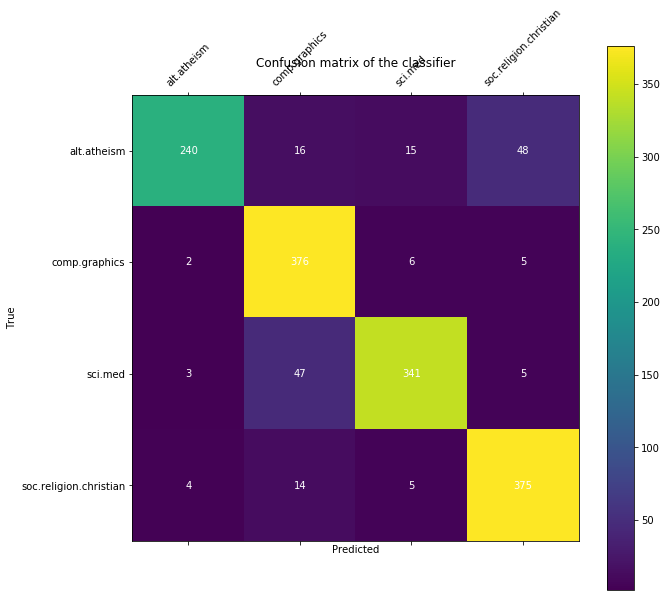

In [37]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

# Exercise 2: Error analysis of False Positives

Performing error analyses is a key part of improving your NLP applications. 

Iterate over the twenty_test.data and, using the list of predictions and labels, print out all the instances where there is a false positive for that class in the sequence (i.e. a false positive is where the label is predicted for a given instance, but this is not the corresponding ground truth label). Format the printed sequences to make it as clear as possible where the error is in the sequence for a given label. 

HINT: This may be achieved most easily by editing the cell above beginning with the comment `# Print out some predictions against the labels`.

For each class's False Positives, think about which features could be added to reduce the number of these errors. The idea is to try to understand where and why the classify mistakenly classifies something as a certain class when it is not of that class. Think about trying some ways to get rid of these errors based on extra features (meta-features like document length, different types of pre-processing, feature extraction etc.).

In [38]:
# SOLUTION: print out the errors and view in terms of false positives
target_categories = [
                     'alt.atheism',
                     'soc.religion.christian',
                      'comp.graphics',
                     'sci.med'
                    ] # allows us to focus on a subset of categories

for doc, label_idx in zip(docs_test, twenty_test.target):
    label = twenty_train.target_names[label_idx]
    prediction = twenty_train.target_names[text_clf.predict([doc])[0]]
    if prediction not in target_categories: # only focus on the target categories
        continue
    if prediction == label: # correct/TP, ignore these
        # print('****TP for {1}:****\n\n {0}\n'.format(doc, label))  # or print them out if needed
        continue
    #if not label == "sci.med":  # focus on a particular confusion
    #    continue
    print('**** FALSE POSITIVE for {1} (ground truth = {2}):****\n\n {0}\n'.format(doc, prediction, label))
    print('*'*50)
    print()
    
    
# SOLUTION: print out the errors and view in terms of false negatives (missed instances)
target_categories = [
                     'alt.atheism',
                     'soc.religion.christian',
                      'comp.graphics',
                     'sci.med'
                    ] # allows us to focus on a subset of categories
for doc, label_idx in zip(docs_test, twenty_test.target):
    label = twenty_train.target_names[label_idx]
    prediction = twenty_train.target_names[text_clf.predict([doc])[0]]
    if label not in target_categories: # only focus on the target categories
        continue
    if prediction == label: # correct/TP, ignore these
        # print('****TP for {1}:****\n\n {0}\n'.format(doc, label))  # or print them out if needed
        continue
    #if not prediction == "comp.graphics":  # focus on a particular confusion
    #    continue
    print('FALSE NEGATIVE FOR {2} (prediction = {1}):\n {0}\n'.format(doc, prediction, label))
    print('*'*50)
    print()

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: GWGREG01@ukcc.uky.edu
Subject: Re: Pregnency without sex?
Nntp-Posting-Host: ukcc.uky.edu
Organization: The University of Kentucky
X-Newsreader: NNR/VM S_1.3.2
Lines: 27

In article <C6BotF.137@r-node.hub.org>
taob@r-node.hub.org (Brian Tao) writes:
 
>In article <1993Apr27.182155.23426@oswego.Oswego.EDU>, Harry Matthews writes...
>>
>> I've heard of community swimming pools refered to as PUBLIC URINALS so what
>> else is going on?
>
>    Do you swim nude in a public swimming pool?  :)  I doubt sperm can
>penetrate swimsuit material, assuming they aren't immediately dispersed
>by water currents.
>--
>Brian Tao:: taob@r-node.hub.org (r-Node BBS, 416-249-5366, FREE!)
>::::::::::: 90taobri@wave.scar.utoronto.ca (University of Toronto)
 
Here we go again.
 
 
U   UK   K UNIVERSITY                                 GARY W. GREGORY
U   UK  K  OF KENTUCKY                          GWGREG01@UKCC.UKY.EDU
U   UKKK   _______

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: groleau@e7sa.crd.ge.com (Wes Groleau X7574)
Subject: Re: Discussions on alt.psychoactives
Nntp-Posting-Host: 144.219.40.1
Organization: GE Corp R&D Center, Schenectady NY
Lines: 3

Re: serious discussion about drugs vs. "Where can I get a good bong, man?"

Why not have the group moderated?  That would eliminate some of the idiots.


**************************************************

**** FALSE POSITIVE for comp.graphics (ground truth = alt.atheism):****

 From: T.G.Nattress@newcastle.ac.uk (Graeme Nattress)
Subject: Re: Cults Vs. Religions?
Nntp-Posting-Host: newton
Organization: University of Newcastle upon Tyne, UK, NE1 7RU
Lines: 12

jgreen@trumpet.calpoly.edu (James Thomas Green) writes:


A religion is a cult which if those in power belong to it.

Actually, they're all bull shit.

Graeme,
{---    T.G.Nattress@uk.ac.ncl -----------------------------------------}
{-----Hitler is Nibor from the Planet Vashir

**** FALSE POSITIVE for soc.religion.christian (ground truth = alt.atheism):****

 From: kempmp@phoenix.oulu.fi (Petri Pihko)
Subject: Re: Consciousness part II - Kev Strikes Back!
Organization: University of Oulu, Finland
X-Newsreader: TIN [version 1.1 PL9]
Lines: 207

Kevin Anthoney (kax@cs.nott.ac.uk) wrote:

(about my reply)

> Diplomatic :-)

It a society that is constantly on the verge of flaming, Usenet, diplomacy
is the best way to ensure the voice of reason gets through, isn't it?

> I realize I'm fighting Occam's razor in this argument, so I'll try to
> explain why I feel a mind is necessary. 

Kevin, unfortunately you are now delving into field I know too little
about, algorithms. Your reasoning, as I see it, is very much along the
lines of Roger Penrose, who claimed that mathematical 'insight' cannot
be algorithmic in his book _The emperor's new mind: Concerning
computers, minds, and the laws of physics_. However, Penrose's
claim that he _has_ mathematical insight, or your 

**** FALSE POSITIVE for comp.graphics (ground truth = soc.religion.christian):****

 From: cs89mcd@brunel.ac.uk (Michael C Davis)
Subject: Leadership Magazine article
Organization: Brunel University, Uxbridge, UK
Lines: 11

I'm looking for the following article:

	``The War Within: an Anatomy of Lust''
	Leadership 3 (1985), pp 30-48

I've looked in the libraries of 3 UK Bible Colleges, but none of them subscribe
to the Magazine (its a US publication, btw). If anyone has access to this
article and would be willing to post me a photocopy (I presume that copyright
restrictions will allow this?), please e-mail me. Thanks,
-- 
Michael Davis (cs89mcd@brunel.ac.uk)


**************************************************

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: tysoem@facman.ohsu.edu (Marie E Tysoe)
Subject: sciatica
Distribution: usa
Organization: Oregon Health Sciences University
Lines: 1
Nntp-Posting-Host: facman

Ideas for the relief of sciatica. Please res

**** FALSE POSITIVE for soc.religion.christian (ground truth = alt.atheism):****

 From: lamontg@u.washington.edu
Subject: Re: High Times A Comin'!!!!!!!
Organization: 'Operation: Mindcrime'
Lines: 14
Reply-To: lamontg@u.washington.edu
NNTP-Posting-Host: mead.u.washington.edu
Originator: lamontg@mead.u.washington.edu

rubble@leland.Stanford.EDU (Adam Heath Clark) writes:
>	It seems a very large part of Christianity is based on the notion that
>it is the _right_ religion, and that just about any other way of looking at
>the universe is flat-out wrong.  In the old days we had the Inquisition and the
>burning of heretics; now we have Pat Buchanan trying to start some cultural
>war because he can't stand to live in the same country as all these other,
>non-"God fearing" people.

its a survival trait.  there are only a fixed number of resources (people)
for religions to inhabit.  the doctrines of intolerance and not using
birth control are devices whereby the meme of the (capital-R) Religio

**** FALSE POSITIVE for comp.graphics (ground truth = alt.atheism):****

 From: schnitzi@eustis.cs.ucf.edu (Mark Schnitzius)
Subject: Re: Asimov stamp
Organization: University of Central Florida
Lines: 18

battin@cyclops.iucf.indiana.edu (Laurence Gene Battin) writes:

>Apart from the suggestion that appeared in the letters column of
>Skeptical Inquirer recently, has there been any further mention
>about a possible Asimov commemorative stamp?  If this idea hasn't
>been followed up, does anyone know what needs to be done to get
>this to happen?  I think that its a great idea.  Should we start a
>petition or something?

I'm sure all the religious types would get in a snit due
to Asimov's atheism.

Do we have any atheists on stamps now?


Mark Schnitzius
schnitzi@eola.cs.ucf.edu
University of Central Florida


**************************************************

**** FALSE POSITIVE for sci.med (ground truth = soc.religion.christian):****

 From: eledw@nuscc.nus.sg (Simon D. Wibowo)
Subject

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: taob@r-node.hub.org (Brian Tao)
Subject: Re: Pregnency without sex?
Organization: MuGS Research and Development Facility
X-Newsreader: MuGS 3.0d16 [Apr 22 93]
To: matthews@oswego.Oswego.EDU (Harry Matthews)
Reply-To: taob@r-node.hub.org
Lines: 11

In article <1993Apr27.182155.23426@oswego.Oswego.EDU>, Harry Matthews writes...
> 
> I've heard of community swimming pools refered to as PUBLIC URINALS so what
> else is going on?

    Do you swim nude in a public swimming pool?  :)  I doubt sperm can
penetrate swimsuit material, assuming they aren't immediately dispersed
by water currents.
-- 
Brian Tao:: taob@r-node.hub.org (r-Node BBS, 416-249-5366, FREE!)
::::::::::: 90taobri@wave.scar.utoronto.ca (University of Toronto)


**************************************************

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: daless@di.unipi.it (Antonella Dalessandro)
Subject: Epilepsy and 

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: sutton@vxcrna.cern.ch (SUTTON,BERN./SL)
Subject: Hip replacement
News-Software: VAX/VMS VNEWS 1.41    
Organization: European Organization for Nuclear Research, CERN
Lines: 0



**************************************************

**** FALSE POSITIVE for comp.graphics (ground truth = sci.med):****

 From: kryan@stein.u.washington.edu (Kerry Ryan)
Subject: looking for info on kemotherapy(sp?)
Article-I.D.: shelley.1rjpu7INNmij
Organization: University of Washington
Lines: 4
NNTP-Posting-Host: stein.u.washington.edu


Hello, a friend is under going kemotherapy(sp?) for breast cancer. I'm
trying to learn what I can about it. Any info would be appreciated.
Thanks.


**************************************************

**** FALSE POSITIVE for sci.med (ground truth = alt.atheism):****

 From: decay@cbnewsj.cb.att.com (dean.kaflowitz)
Subject: Re: some thoughts.
Organization: AT&T
Distribution: na
Lines: 40

In article 

**** FALSE POSITIVE for soc.religion.christian (ground truth = alt.atheism):****

 From: rjg@doe.carleton.ca (Richard Griffith)
Subject: Re: Burden of Proof
Organization: Dept. of Electronics, Carleton University
Lines: 23

In <1r4b59$7hg@aurora.engr.LaTech.edu> ray@engr.LaTech.edu (Bill Ray) writes:

>If I make a statement, "That God exists, loves me, etc." but in no way
>insist that you believe it, does that place a burden of proof upon me.
>If you insist that God doesn't exist, does that place a burden of proof 
>upon you?  I give no proofs, I only give testimony to my beliefs.  I will
>respond to proofs that you attempt to disprove my beliefs.

What is your reaction to people who claim they were abducted by space aliens?

Some of these people say, "I was abducted, experimented on, etc."
If we insist that these aliens don't exist is the burden of proof placed on
us. These people can give no hard facts but can give a lot of testimony to
back up their beliefs.

Replace <space aliens> 

**** FALSE POSITIVE for soc.religion.christian (ground truth = alt.atheism):****

 From: marshall@csugrad.cs.vt.edu (Kevin Marshall)
Subject: Re: Faith and Dogma
Organization: Virginia Tech Computer Science Dept, Blacksburg, VA
Lines: 73
NNTP-Posting-Host: csugrad.cs.vt.edu

tgk@cs.toronto.edu (Todd Kelley) writes:

>Faith and dogma are irrational.  The faith and dogma part of any religion
>are responsible for the irrationality of the individuals.

I disagree.  In the end, the *individual* is responsible for his/her own
irrationality.  The individual's belief in some dogmatic religion is a 
symptom of that irrationality.

>Have you noticed that philosophers tend to be atheists?

Atheists and agnostics, I would imagine, but yes, that was my point.  An
atheist would theoretically be just as ill-equipped to study the philosophy
of religion as a Christian, and yet there is a persistence of atheists
among the ranks of philosophers.  Therefore, the conflict between one's
religious beliefs (o

**** FALSE POSITIVE for comp.graphics (ground truth = alt.atheism):****

 From: madhaus@netcom.com (Maddi Hausmann)
Subject: Re: Nicknames
Organization: Society for Putting Things on Top of Other Things
Lines: 18

cmtan@iss.nus.sg (Tan Chade Meng - dan) writes: >
>Somebody forgotten me................
>
>"No Nickname" Tan Chade Meng
>(Chinese have nicknames in the front)
>
>--
>
>The UnEnlightened One


I thought your nickname was "UnEnlightened"
-- 
Maddi Hausmann                       madhaus@netcom.com
Centigram Communications Corp        San Jose California  408/428-3553

Kids, please don't try this at home.  Remember, I post professionally.



**************************************************

**** FALSE POSITIVE for sci.med (ground truth = alt.atheism):****

 From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee)
Subject: Re: Gulf War and Peace-niks
Organization: Johns Hopkins University CS Dept.
Lines: 17

In article <1993Apr20.102306.882@batman.bmd.trw.com> jbrown@batman.bmd.trw.

**** FALSE POSITIVE for alt.atheism (ground truth = comp.graphics):****

 From: kyle@wam.umd.edu (Kyle Xavier Hourihan)
Subject: Re: Where did the hacker ethic go?
Organization: University of Maryland, College Park
Lines: 41
NNTP-Posting-Host: rac2.wam.umd.edu

In article <12MAY199322394641@vxcrna.cern.ch> filipe@vxcrna.cern.ch (VINCI) writes:
    .. blah blah .. talking about hackers.. you know ..


Wow!  A new proof for an NP-Complete problem, you guys in Eurpoe
really got your stuff together!


Base Step:  [deleted too bad]

Inductive Step:
>
> But anyway, poor golfers, bad carpenters or bad surgeons are not
> thieves, so your assertion that hacker==thief is unsupported by
> your argument, IMHO. The narrower view that a hacker, when
> associated with the computing environment, is a dishonest
> expert is not so widespread ...

Inductive Hypothesis:
> Therefore I conclude that if you call yourself a hacker, and somebody
> perceives you as a thief, then this person belongs to a very ve

**** FALSE POSITIVE for soc.religion.christian (ground truth = alt.atheism):****

 From: aaron@minster.york.ac.uk
Subject: Re: Death Penalty / Gulf War (long)
Distribution: world
Organization: Department of Computer Science, University of York, England
Lines: 17

Mark McCullough (mccullou@snake2.cs.wisc.edu) wrote:
: This figure, is far below all the other figures I have seen.  If it
: is indeed accurate, then how do you explain the discrepancy between
: that figure, and other figures from international organizations?
: Most figures I have seen place the hit ratio close to 70%, which is 
: still far higher than your 35%.  Or does your figure say a bomb
: missed if the plane took off with it, and the bomb never hit the target,
: regardless of whether or not the bomb was dropped?  Such methods
: are used all the time to lie with statistics.

Answering the last sentence, claimed that they had a success rate of 80%
without initially explaining, until pressed, that this meant that 80%
of th

# SOLUTION: FP observation notes per class (for Logistic Regression classifier)

## alt.atheism
LR is a very precise classifier out of the box for alt.atheism (Prec=0.96) with few FPs and the few false alarms included soc.religion.christian emails which mention atheists and atheism several times, which is an understandable misclassification. The confusion with comp.graphics in interesting: one mistake was the email with "Where did the hacker ethic go?" in the header, where presumably the word "ethic" is frequent in atheism articles. Bigram features may help here as "hacker ethic" is lightly to discriminate better.

## soc.religion.christian
Precision is slightly lower for soc.religion.christian (Prec=0.87), mainly due to the false classification of alt.atheism documents as soc.religion.christian. Quite a lot of the text in these errorful documents are embedded reviews/replies/comments on emails or texts from Christians e.g. ">The fact is God could cause you to believe anything He wants you to." is an inline email quotation indicated by “>”. Given this, some more structured feature input which identifies embedded replies/reviews as different to the main text could help. Sometimes not cleaning all the formatting and special characters is a good idea before using them for feature extraction. The word "Christians" is often used in the alt.atheism emails as othering a group rather than talking about themselves- this is semantically difficult to identify.

## comp.graphics
comp.graphics has the lowest class precision out of all the classes (Prec=0.83). The most common false prediction is on sci.med documents. There are some words that look potentially relevant to comp.graphics which appear in sci.med emails such as "email" and "colleges". There are a number of mentions of "data", which relates across the disciplines. Some look like a genuine blend of topics, as indicated by sentences/headers like "allergic reactions against laser printers??". We would have to do a full feature ranking to see how predictive words are for each class (e.g. show the mutual information of each word with each class and list them in order of their informativeness).

## sci.med
sci.med has a high precision (Prec=0.93) and the biggest number of false predictions is on alt.atheism texts. Upon inspection a number of the texts about atheism include scientific vocabulary, including the word "theory". The difference is that the atheism texts are putting arguments forward about science, rather than assuming a scientific area of practice and discussion. Perhaps adding another classification label from using a stance detector could help here, e.g. http://nlpprogress.com/english/stance_detection.html



# Exercise 3: Error analysis of False Negatives
Do the same as in Exercise 2 but for false negatives (note the incorrect predictions will be the same as in exercise 2, but identifying the classes for which this will be an error will be different). 

For each class's False Negatives, think about which features could be added to reduce the number of these errors.  The idea is to try to understand where and why the classify mistakenly misses something as being of a certain class.

In [40]:
# SOLUTION: print out the errors and view in terms of false negatives (missed instances)
target_categories = [
                     'alt.atheism',
                     'soc.religion.christian',
                      'comp.graphics',
                     'sci.med'
                    ] # allows us to focus on a subset of categories
for doc, label_idx in zip(docs_test, twenty_test.target):
    label = twenty_train.target_names[label_idx]
    prediction = twenty_train.target_names[text_clf.predict([doc])[0]]
    if label not in target_categories: # only focus on the target categories
        continue
    if prediction == label: # correct/TP, ignore these
        # print('****TP for {1}:****\n\n {0}\n'.format(doc, label))  # or print them out if needed
        continue
    #if not prediction == "comp.graphics":  # focus on a particular confusion
    #    continue
    print('FALSE NEGATIVE FOR {2} (prediction = {1}):\n {0}\n'.format(doc, prediction, label))
    print('*'*50)
    print()

FALSE NEGATIVE FOR sci.med (prediction = comp.graphics):
 From: GWGREG01@ukcc.uky.edu
Subject: Re: Pregnency without sex?
Nntp-Posting-Host: ukcc.uky.edu
Organization: The University of Kentucky
X-Newsreader: NNR/VM S_1.3.2
Lines: 27

In article <C6BotF.137@r-node.hub.org>
taob@r-node.hub.org (Brian Tao) writes:
 
>In article <1993Apr27.182155.23426@oswego.Oswego.EDU>, Harry Matthews writes...
>>
>> I've heard of community swimming pools refered to as PUBLIC URINALS so what
>> else is going on?
>
>    Do you swim nude in a public swimming pool?  :)  I doubt sperm can
>penetrate swimsuit material, assuming they aren't immediately dispersed
>by water currents.
>--
>Brian Tao:: taob@r-node.hub.org (r-Node BBS, 416-249-5366, FREE!)
>::::::::::: 90taobri@wave.scar.utoronto.ca (University of Toronto)
 
Here we go again.
 
 
U   UK   K UNIVERSITY                                 GARY W. GREGORY
U   UK  K  OF KENTUCKY                          GWGREG01@UKCC.UKY.EDU
U   UKKK   ___________________

FALSE NEGATIVE FOR comp.graphics (prediction = sci.med):
 From: carlos@carlos.jpr.com (Carlos Dominguez)
Subject: Re: Where did the hacker ethic go?
Reply-To: carlos@carlos.jpr.com
Organization: Private Helldiver/Usenet system, Brooklyn, NY, USA
Lines: 38
X-Newsreader: Helldiver 1.07 (Waffle 1.65)

In <1sp4qj$243@dorsai.dorsai.org> crawls@dorsai.dorsai.org (Charles Rawls) writes:

>The hacker ethic is ALIVE and WELL here.  I know of what you speak, and my
>only answer is "SCREW 'EM".  You have to do what make you feel right.

amen.. I too have learned by example, specifically yours. :)

>What can I say but keep the faith, there are others who do likewise.

.. but dorsai leads the way.. Unlike other services that are commercial
in nature, dorsai is a community based service. While others charge
monthly fees for access, dorsai accepts donations from those who can
afford to contribute.

   While other systems don't respond to user input, dorsai thrives on it.
Other systems sell hardware f

FALSE NEGATIVE FOR sci.med (prediction = comp.graphics):
 From: Randy_Faneuf@vos.stratus.com
Subject: Urine analysis
Organization: Stratus Computer, Marlboro Ma.
Lines: 36
NNTP-Posting-Host: m72.eng.stratus.com





 Someone please help me. I am searching to find out (as many others may)
an absolute 'cure' to removing all detectable traces of marijuana from
a persons body. Is there a chemical or natural substance that can be
ingested or added to urine to make it undetectable in urine analysis.
If so where can these substances be found. 

            If you know this information, please Email me directly
             
                Thank You Kindly for your support,


                         Randy






















**************************************************

FALSE NEGATIVE FOR comp.graphics (prediction = soc.religion.christian):
 From: pdudey@willamette.edu (The Lisp SubGuru)
Subject: Re: Where did the hacker ethic go?
Article-I.D.: willamet.C6D4BJ.Du
Organization: Willam

FALSE NEGATIVE FOR alt.atheism (prediction = soc.religion.christian):
 From: acooper@mac.cc.macalstr.edu (Turin Turambar, ME Department of Utter Misery)
Subject: Re: Christian Morality is
Organization: Macalester College
Lines: 107

In article <4963@eastman.UUCP>, dps@nasa.kodak.com (Dan Schaertel,,,) writes:
> In article 21627@ousrvr.oulu.fi, kempmp@phoenix.oulu.fi (Petri Pihko) writes:
> |>Dan Schaertel,,, (dps@nasa.kodak.com) wrote:
> |>
> |>
> |>I love god just as much as she loves me. If she wants to seduce me,
> |>she'll know what to do. 
> |>
> 
> But if He/She did you would probably consider it rape.  

Probably because it IS rape.

> 
> |>: Simple logic arguments are folly.  If you read the Bible you will see
> |>: that Jesus made fools of those who tried to trick him with "logic".
> |>: Our ability to reason is just a spec of creation.  Yet some think it is
> |>: the ultimate.  If you rely simply on your reason then you will never
> |>: know more than you do now. 
> |>
> |>Yo

FALSE NEGATIVE FOR alt.atheism (prediction = comp.graphics):
 From: ed@wente.llnl.gov (Ed Suranyi)
Subject: Re: Asimov stamp
Organization: UC Davis Dept of Applied Science at LLNL
Lines: 18
NNTP-Posting-Host: wente.llnl.gov

In article <C61H4H.8D4@dcs.ed.ac.uk> pdc@dcs.ed.ac.uk (Paul Crowley) writes:
>Quoting schnitzi@eustis.cs.ucf.edu (Mark Schnitzius) in article <schnitzi.735603785@eustis>:
>>I'm sure all the religious types would get in a snit due
>>to Asimov's atheism.

>Can someone confirm this?  Someone told me that Asimov converted to
>Christianity at some point, or something.  Does anyone have any good
>quotes?

What?  Absolutely not.  No way.  Asimov was a lifelong atheist, and
said so many times, right until his death.  Judging from the many
stories he told about his own life, he felt culturally closest to
Judaism, which makes sense. He was born Jewish.

Ed
ed@wente.llnl.gov




**************************************************

FALSE NEGATIVE FOR alt.atheism (prediction = s

FALSE NEGATIVE FOR alt.atheism (prediction = sci.med):
 From: aaron@minster.york.ac.uk
Subject: Re: Gulf War / Selling Arms
Distribution: world
Organization: Department of Computer Science, University of York, England
Lines: 14

Mark McCullough (mccullou@snake10.cs.wisc.edu) wrote:
: I heard about the arms sale to Saudi Arabia.  Now, how is it such a grave
: mistake to sell Saudi Arabia weapons?  Or are you claiming that we shouldn't
: sell any weapons to other countries?  Straightforward answer please.

Saudi Arabia is an oppressive regime that has been recently interfering
in the politcs of newly renunified Yemen, including assasinations and 
border incursions. It is entirely possible that they will soon invade.
Unluckily for Yemen it is not popular in the West as they managed to put
aside political differences during reunification and thus the West has
effectively lost one half (North?) as a client state.

		Aaron Turner
 


**************************************************

FALSE 

FALSE NEGATIVE FOR soc.religion.christian (prediction = comp.graphics):
 From: crackle!dabbott@munnari.oz.au (NAME)
Subject: "Why I am not Bertrand Russell" (2nd request)
Reply-To: dabbott@augean.eleceng.adelaide.edu.au (Derek Abbott)
Organization: Electrical & Electronic Eng., University of Adelaide
Lines: 4

Could the guy who wrote the article "Why I am not Bertrand Russell"
resend me a copy?

Sorry, I accidently deleted my copy and forgot your name.


**************************************************

FALSE NEGATIVE FOR alt.atheism (prediction = sci.med):
 From: decay@cbnewsj.cb.att.com (dean.kaflowitz)
Subject: Re: some thoughts.
Organization: AT&T
Distribution: na
Lines: 10

In article <1993Apr26.000410.18114@daffy.cs.wisc.edu>, mccullou@snake2.cs.wisc.edu (Mark McCullough) writes:
> In article <C62B52.LKz@blaze.cs.jhu.edu> arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) writes:
> >I can think of a lot more agonizing ways to get killed.  Fatal cancer, for
> >instance.
> >
> >Anyone

FALSE NEGATIVE FOR sci.med (prediction = comp.graphics):
 From: gecko@camelot.bradley.edu (Anastasia Defend)
Subject: Physical Therapy Students
Nntp-Posting-Host: camelot.bradley.edu
Organization: Bradley University
Lines: 13



I am interested in finding other Physical Therapy Students on the
net...If you are one, or you know anyone could you get into contact
with me via email, my address is

gecko@camelot.bradley.edu


				thankyou

					anastasia
 


**************************************************

FALSE NEGATIVE FOR alt.atheism (prediction = comp.graphics):
 From: "Robert Knowles" <p00261@psilink.com>
Subject: Re: THE POPE IS JEWISH!
In-Reply-To: <bruce.735329589@cortex>
Nntp-Posting-Host: 127.0.0.1
Organization: Performance Systems Int'l
X-Mailer: PSILink-DOS (3.3)
Lines: 35

>DATE:   Tue, 20 Apr 1993 18:13:09 GMT
>FROM:   R. Bruce Rakes <bruce@cortex.dixie.com>
>
>mcgoy@unicorn.acs.ttu.edu (David McGaughey) writes:
>
>>I always thought that the Pope was a bear.
>
>>You know, b

FALSE NEGATIVE FOR alt.atheism (prediction = soc.religion.christian):
 From: marshall@csugrad.cs.vt.edu (Kevin Marshall)
Subject: Re: Faith and Dogma
Organization: Virginia Tech Computer Science Dept, Blacksburg, VA
Lines: 73
NNTP-Posting-Host: csugrad.cs.vt.edu

tgk@cs.toronto.edu (Todd Kelley) writes:

>Faith and dogma are irrational.  The faith and dogma part of any religion
>are responsible for the irrationality of the individuals.

I disagree.  In the end, the *individual* is responsible for his/her own
irrationality.  The individual's belief in some dogmatic religion is a 
symptom of that irrationality.

>Have you noticed that philosophers tend to be atheists?

Atheists and agnostics, I would imagine, but yes, that was my point.  An
atheist would theoretically be just as ill-equipped to study the philosophy
of religion as a Christian, and yet there is a persistence of atheists
among the ranks of philosophers.  Therefore, the conflict between one's
religious beliefs (or lack there

FALSE NEGATIVE FOR sci.med (prediction = comp.graphics):
 From: enea1@applelink.apple.com (Horace Enea)
Subject: Persistent vs Chronic
Organization: Apple Computer
Lines: 6

Can anyone out there tell me the difference between a "persistent" disease
and a "chronic" one? For example, persistent hepatitis vs chronic
hepatitis.

Thanks,
Horace


**************************************************

FALSE NEGATIVE FOR sci.med (prediction = comp.graphics):
 From: scheiber@sage.cc.purdue.edu (Jennifer Scheiber)
Subject: Re: Pregnency without sex?
Organization: Purdue University Computing Center
Lines: 15

In article <1993Apr27.182155.23426@oswego.Oswego.EDU> matthews@oswego.Oswego.EDU (Harry Matthews) writes:
>All right, listen up....  What are the possibilities of transmission through
>swimming pool water?  Especially if the chlorination isn't up to par?
>
>I've heard of community swimming pools refered to as PUBLIC URINALS so what
>else is going on?
>
>

But the sperm would be very diluted in

FALSE NEGATIVE FOR sci.med (prediction = comp.graphics):
 From: doyle+@pitt.edu (Howard R Doyle)
Subject: ROC curves software
Organization: Pittsburgh Transplant Institute
Lines: 10


I understand Robert Centor has a program called ROC ANALYZER, that can be
used to do receiver operating characteristic (ROC) curve analysis. Does 
anyone know if this is avaliable from an FTP site? If not, does anyone
know how to get a copy of it?


Howard Doyle
doyle+@pitt.edu


**************************************************

FALSE NEGATIVE FOR soc.religion.christian (prediction = alt.atheism):
 From: mangoe@cs.umd.edu (Charley Wingate)
Subject: Hyslop and _The_Two_Babylons_
Lines: 9

Seeing as how _The_Two_Babylons_ has been brought up again, it is time for
me to respond , once again, and say that this book is junk.  It is nothing
more that an anti-Catholic tract of the sort published ever since the there
were protestants.  Its scholarship is phony and its assertions spurious.
-- 
C. Wingate        

# SOLUTION: FN observation notes per class (for Logistic Regression classifier)

## alt.atheism
LR classification exhibits the lowest recall for alt.atheism (Recall=0.75), missing a quarter of the TPs in the dataset. The majority of these mistakes are the misclassification as soc.religion.christian, for the reasons given in the FP for soc.religion.christian above. The errors of misclassifying as sci.med and soc.religion.christian are discussed above. It is less clear why the false classifications of comp.graphics are happening- again, email addresses, email headers and other metadata could be worth separating out in the features.

## soc.religion.christian
soc.religion.christian has a high recall (0.94) and surprisingly few are misclassified as alt.atheism (there are more classifications in the other direction here, see above), and in fact more are misclassified as comp.graphics. Some of these arguably blend both topics, as per the sentence "What presentation package would you recommend for a Bible teacher?".


## comp.graphics
comp.graphics has a very high recall (0.97) with very few ground truth instances being misclassified. The confusions with sci.med are understandable, as discussed above in the FP section, and the misclassifications as soc.religion.christian again look to be confused by words like 'ethic' and related principles on hacking being listed.


## sci.med
sci.med has a slightly lower recall (0.86) than its precision, and, as described above in the FPs, this is largely due to the misclassification as comp.graphics. The few misclassifications as soc.religion.christian look to have religious/Christian language in them, e.g. "SREBRENICA'S DOCTOR RECOUNTS TOWN'S LIVING HELL", suggesting the limits of a unigram/bag-of-words approach.